# Goal : walmart data analysing을 통한 매출 증진 marketing strategy 도출

In [249]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [251]:
# 데이터 불러오기 
df = pd.read_csv('../mini_project_1/walmart.csv')
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365


In [255]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [257]:
# obj -> int is more better to analysis? or...
# purchase 는 구매횟수 이므로, object로 바꾸기 보다는 int로 유지하는게 좋을 듯
# userId, occupation, MaritalStatus, ProductCategory 모두  object로 바꾸는게 좋을 듯

df['User_ID'] = df['User_ID'].astype('object')
df['Occupation'] = df['Occupation'].astype('object')
df['Marital_Status'] = df['Marital_Status'].astype('object')
df['Product_Category'] = df['Product_Category'].astype('object')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  object
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  object
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  object
 8   Product_Category            550068 non-null  object
 9   Purchase                    550068 non-null  int64 
dtypes: int64(1), object(9)
memory usage: 42.0+ MB


In [259]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Purchase,550068.0,9263.968713,5023.065394,12.0,5823.0,8047.0,12054.0,23961.0


In [494]:
df.describe(include = 'object').T

,count,unique,top,freq
User_ID,550068,5891,1001680,1026
Product_ID,550068,3631,P00265242,1880
Gender,550068,2,M,414259
Age,550068,7,26-35,219587
Occupation,550068,21,4,72308
City_Category,550068,3,B,231173
Stay_In_Current_City_Years,550068,5,1,193821
Marital_Status,550068,2,0,324731
Product_Category,550068,20,5,150933


-------------------------------------------------------------------------------------

In [281]:
sns.color_palette('coolwarm')

[(0.4044212904941176, 0.5346434904470588, 0.9320019126352941),
 (0.603162067917647, 0.7315274773529412, 0.9995652785372549),
 (0.7867207013568628, 0.8448072103686275, 0.9398103849490196),
 (0.9306685963333333, 0.818876999654902, 0.7591463906980392),
 (0.9673165156666667, 0.6574708288078431, 0.5381601507294118),
 (0.8846434386941177, 0.41001709788235297, 0.32250654924705885)]

In [283]:
base1 = sns.color_palette('coolwarm')[1]
base2 = sns.color_palette('coolwarm')[4]

-------------------------------------------------------------------------------------

### 나이에 따른 구매횟수
- 26-35세 사이 고객들의 구매횟수가 가장 높다.

In [265]:
# Number of purchases by age group
purchase_count_age = df.groupby('Age')['Purchase'].count()
print(purchase_count_age)

Age
0-17      15102
18-25     99660
26-35    219587
36-45    110013
46-50     45701
51-55     38501
55+       21504
Name: Purchase, dtype: int64


C:\Users\HHS\AppData\Local\Temp\ipykernel_3688\633392420.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = age_df, x = 'Age', y = 'purchase count by age', palette = colors)


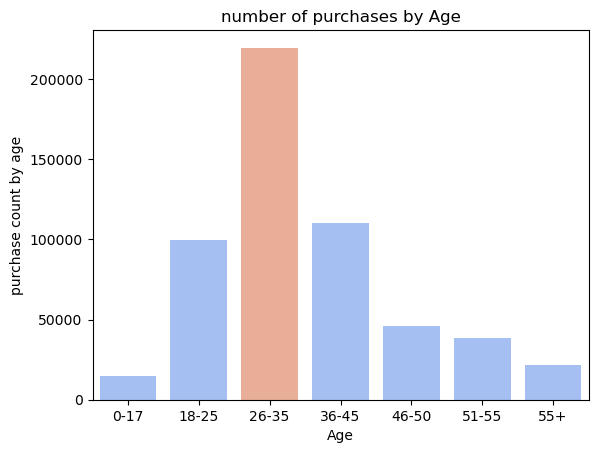

In [291]:
# sns.countplot(data = df, x = 'Age',  palette = 'Paired', order = sorted(df_copy['Age'].unique()))

age_df = df.groupby(['Age']).size().to_frame("purchase count by age").reset_index() 
top_1_age = age_df['purchase count by age'].nlargest(1).values

colors = [base1 if i not in top_1_age else base2 for i in age_df['purchase count by age']]

sns.barplot(data = age_df, x = 'Age', y = 'purchase count by age', palette = colors)
plt.title('number of purchases by Age')
plt.show()

#### 성별에 따른 구매횟수
- 남성 고객이 75.31%로 여성 고객 대비 약 3배 이상 많다.

In [305]:
# Number of purchases by gender
purchase_count_gender = df.groupby('Gender')['Purchase'].count()
print(purchase_count_gender)

Gender
F    135809
M    414259
Name: Purchase, dtype: int64


In [321]:
# Number of purchases by gender
male = 414259
female = 135809
total_gender = male + female

male_per = (male/total_gender)*100
female_per = (female/total_gender)*100

print(f'Male: {male_per:.2f}%')
print(f'Female: {female_per:.2f}%')

Male: 75.31%
Female: 24.69%


C:\Users\HHS\AppData\Local\Temp\ipykernel_3688\2809136608.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df, x = 'Gender',  palette = 'coolwarm')


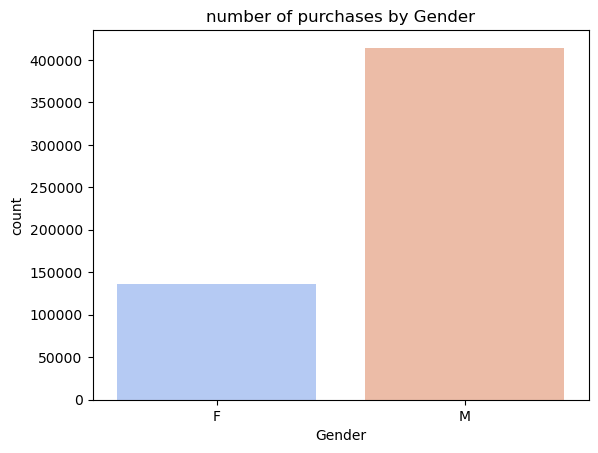

In [285]:
sns.countplot(data = df, x = 'Gender',  palette = 'coolwarm')
plt.title('number of purchases by Gender')
plt.show()

### 나이와 성별에 따른 구매횟수
- 26-35세 남성의 구매도가 가장 높다.
- 36-45세의 남성 > 18-25세의 남성 순으로 구매도가 높다.
- 여성에서는 26-35세가 가장 구매도가 높지만, 같은 나이대의 남성에 비해 구매도가 약 1/3이상 낮다.

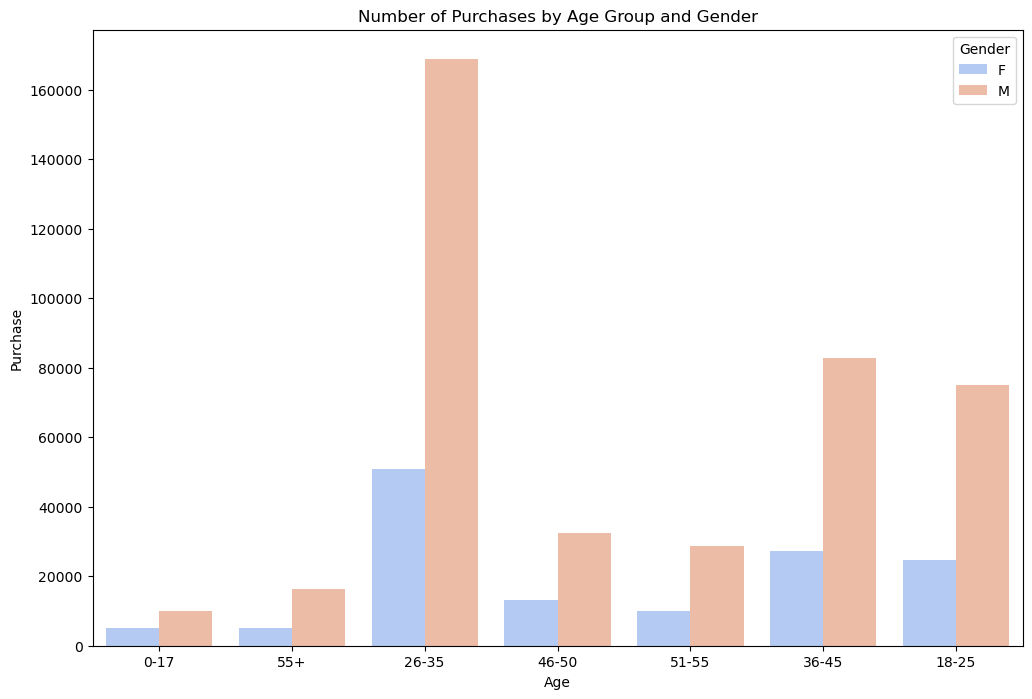

In [413]:
# 나이에 따라 남성과 여성의 상품 카테고리별 구매 수를 비교한다.
# 비교를 통해, 나이에 따라 구매 패턴이 달라짐을 예측해볼 수 있다.

plt.figure(figsize=(12,8))
sns.countplot(data = df, x = 'Age',  hue= 'Gender', palette = 'coolwarm')

plt.xlabel('Age')
plt.ylabel('Purchase')
plt.title('Number of Purchases by Age Group and Gender')
plt.legend(title = 'Gender')
plt.show()

#### 상품별 구매횟수
- 상위 20개 상품의 구매횟수이다.

In [267]:
# Number of purchases by Product Id (descending)
purchase_count_Product_ID = df.groupby('Product_ID')['Purchase'].count()
purchase_count_Product_ID = purchase_count_Product_ID.sort_values(ascending=False)
# print(purchase_count_Product_ID)
purchase_count_Product_ID.head(20)

Product_ID
P00265242    1880
P00025442    1615
P00110742    1612
P00112142    1562
P00057642    1470
P00184942    1440
P00046742    1438
P00058042    1422
P00145042    1406
P00059442    1406
P00237542    1394
P00255842    1383
P00117942    1364
P00110942    1360
P00010742    1350
P00220442    1282
P00110842    1281
P00117442    1260
P00051442    1249
P00102642    1246
Name: Purchase, dtype: int64

C:\Users\HHS\AppData\Local\Temp\ipykernel_3688\2353365297.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = pID_df, x = 'Product_ID', y = 'purchase count by product ID', palette = colors)


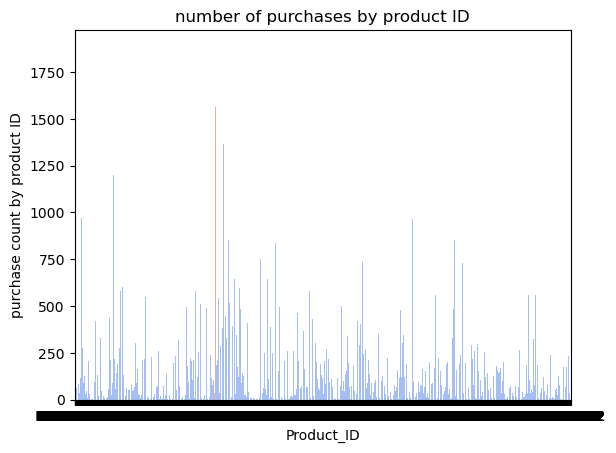

In [505]:
pID_df = df.groupby(['Product_ID']).size().to_frame("purchase count by product ID").reset_index() 
top_5_pID = pID_df['purchase count by product ID'].nlargest(10).values

colors = [base1 if i not in top_5_pID else base2 for i in pID_df['purchase count by product ID']]

sns.barplot(data = pID_df, x = 'Product_ID', y = 'purchase count by product ID', palette = colors)
plt.title('number of purchases by product ID')
plt.show()

#### 직업별 구매횟수
- 4,0,7,1,17의 직업을 가진 고객들의 구매횟수가 높다.

In [271]:
# Number of purchases by Occupation (desceding by num of purchases)
purchase_count_occupation = df.groupby('Occupation')['Purchase'].count()
purchase_count_occupation = purchase_count_occupation.sort_values(ascending = False)
print(purchase_count_occupation)

Occupation
4     72308
0     69638
7     59133
1     47426
17    40043
20    33562
12    31179
14    27309
2     26588
16    25371
6     20355
3     17650
10    12930
5     12177
15    12165
11    11586
19     8461
13     7728
18     6622
9      6291
8      1546
Name: Purchase, dtype: int64


C:\Users\HHS\AppData\Local\Temp\ipykernel_3688\1253932002.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = occ_df, x = 'Occupation', y = 'purchase count by occupation', palette = colors)


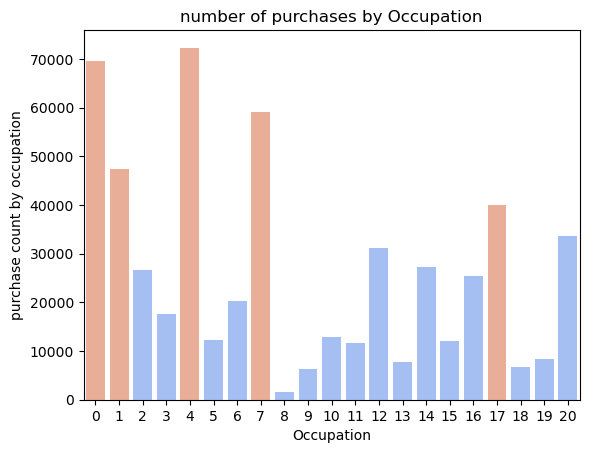

In [289]:
# 1. df.groupby(['Occupation']): 데이터프레임을 Occupation을 기준으로 그룹화한다.
# 2. .size(): 각 그룹의 크기(즉, Occupation별 데이터의 개수)를 계산한다.
# 3. .to_frame("purchase_count_occupation"): 계산된 그룹의 크기(개수)를 데이터프레임으로 변환한다. 새로운 데이터프레임의 컬럼 이름을 "purchase_count_occupation"으로 설정
# 4. .reset_index(): 그룹화된 데이터의 인덱스를 초기화합니다. Occupation 컬럼은 원래 인덱스 역할을 하게 되는데, 이를 데이터프레임의 열로 이동시키고 인덱스를 다시 설정합니다.
# purchase_count_occupation 은 위에서 기존의 occupation을 값을 기준으로 내림차순하여 출력해 놓은 컬럼이다. (이걸 굳이 안써도 된다.)

occ_df = df.groupby(['Occupation']).size().to_frame("purchase count by occupation").reset_index() 
top_5_values = occ_df['purchase count by occupation'].nlargest(5).values

colors = [base1 if i not in top_5_values else base2 for i in occ_df['purchase count by occupation']]

sns.barplot(data = occ_df, x = 'Occupation', y = 'purchase count by occupation', palette = colors)
plt.title('number of purchases by Occupation')
plt.show()

#### 도시별 구매횟수
- B 도시에 거주하는 고객들의 구매횟수가 가장 높다.

In [273]:
# Number of purchases by City_Category (desceding by num of purchases)
purchase_count_City_Category = df.groupby('City_Category')['Purchase'].count()
purchase_count_City_Category = purchase_count_City_Category.sort_values(ascending = False)
print(purchase_count_City_Category)

City_Category
B    231173
C    171175
A    147720
Name: Purchase, dtype: int64


C:\Users\HHS\AppData\Local\Temp\ipykernel_3688\3008011053.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df, x = 'City_Category',  palette = {'A' : base1, 'B': base2, 'C' : base1}, order = sorted(df['City_Category'].unique()))


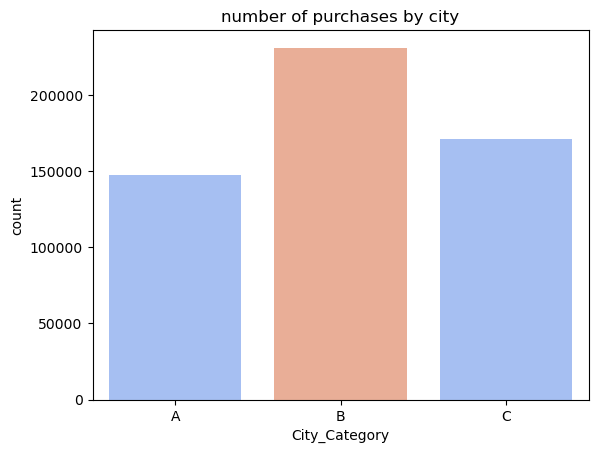

In [293]:
sns.countplot(data = df, x = 'City_Category',  palette = {'A' : base1, 'B': base2, 'C' : base1}, order = sorted(df['City_Category'].unique()))
plt.title('number of purchases by city')
plt.show()

#### 거주 기간 별 구매횟수
- 1년 이상 2년 미만 거주한 고객의 구매횟수가 가장 높다.
    1. 최근 구매 일자나 구매 빈도를 알 수 있는 정보가 없기 때문에, 해당 컬럼 데이터를 '구매 빈도'와 '최근 구매 여부'로 설정할 수 있다.
    2. 1년 이상 거주한 고객들이 상품 구매횟수가 가장 높다.
    3. 새로운 환경에 익숙해지며 구매 패턴을 확립하는 경향으로 볼 수 있다. 

In [275]:
# Number of purchases by Stay_In_Current_City_Years (desceding by num of purchases)
purchase_count_stay_years = df.groupby('Stay_In_Current_City_Years')['Purchase'].count()
purchase_count_stay_years = purchase_count_stay_years.sort_values(ascending = False)
print(purchase_count_stay_years)

Stay_In_Current_City_Years
1     193821
2     101838
3      95285
4+     84726
0      74398
Name: Purchase, dtype: int64


C:\Users\HHS\AppData\Local\Temp\ipykernel_3688\176084876.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df, x = 'Stay_In_Current_City_Years',  palette = {'0' : base1, '1' : base2, '2': base1, '3' : base1, '4+' : base1}, order = sorted(df['Stay_In_Current_City_Years'].unique()))


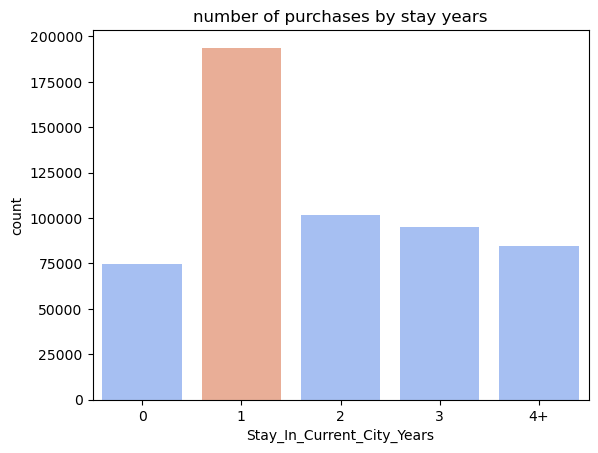

In [295]:
# 1. city에 산 햇수에 따른 구매횟수(1)

sns.countplot(data = df, x = 'Stay_In_Current_City_Years',  palette = {'0' : base1, '1' : base2, '2': base1, '3' : base1, '4+' : base1}, order = sorted(df['Stay_In_Current_City_Years'].unique()))
plt.title('number of purchases by stay years')
plt.show()

#### 혼인 여부별 구매횟수
- 미혼 고객들의 구매횟수가 더 높다. (Marital_Status : 0 = 미혼)

In [277]:
# number of purchases by marital status
purchase_count_maritalStatus = df.groupby('Marital_Status')['Purchase'].count()
print(purchase_count_maritalStatus)

Marital_Status
0    324731
1    225337
Name: Purchase, dtype: int64


C:\Users\HHS\AppData\Local\Temp\ipykernel_3688\2123716655.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df_copy, x = 'Marital_Status', palette = {"Not Married":base2, "Married":base1})


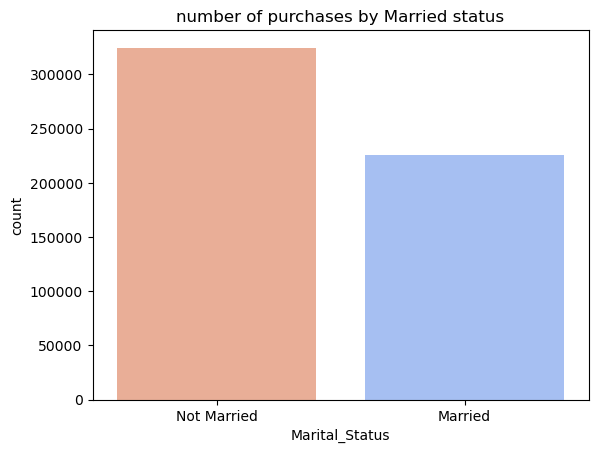

In [287]:
df_copy = df.copy()
df_copy.loc[df_copy['Marital_Status'] == 0, 'Marital_Status'] = 'Not Married'
df_copy.loc[df_copy['Marital_Status'] == 1, 'Marital_Status'] = 'Married'

sns.countplot(data = df_copy, x = 'Marital_Status', palette = {"Not Married":base2, "Married":base1})
plt.title('number of purchases by Married status')
plt.show()

#### 상품 카테고리 별 구매횟수
- 5, 1, 8 상품이 가장 잘 판매되는 상품 top 3이다.

In [487]:
# number of purchases by product category
# purchase_count_category = df.groupby('Product_Category')['Purchase'].count()
purchase_count_category = purchase_count_category.sort_values(ascending = False)
print(purchase_count_category)

Product_Category
5     150933
1     140378
8     113925
11     24287
2      23864
6      20466
3      20213
4      11753
16      9828
15      6290
13      5549
10      5125
12      3947
7       3721
18      3125
20      2550
19      1603
14      1523
17       578
9        410
Name: Purchase, dtype: int64


C:\Users\HHS\AppData\Local\Temp\ipykernel_3688\111190834.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = category_df, x = 'Product_Category', y = 'purchase count by product Category', palette = colors)


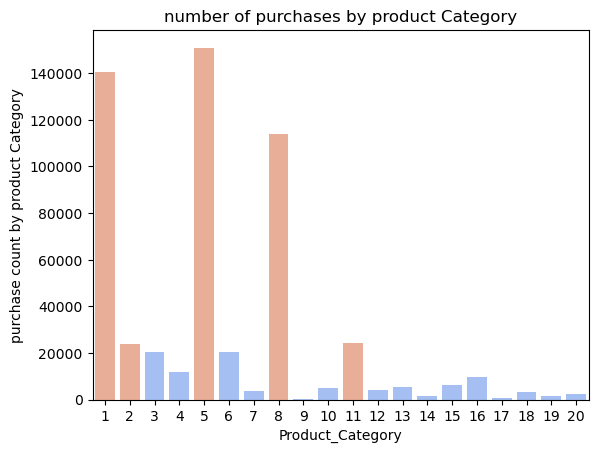

In [300]:
category_df = df.groupby(['Product_Category']).size().to_frame("purchase count by product Category").reset_index() 
top_5_category = category_df['purchase count by product Category'].nlargest(5).values

colors = [base1 if i not in top_5_category else base2 for i in category_df['purchase count by product Category']]

sns.barplot(data = category_df, x = 'Product_Category', y = 'purchase count by product Category', palette = colors)
plt.title('number of purchases by product Category')
plt.show()

#### 혼인여부와 성별에 따른 구매횟수 비교하기 
1. 남성의 혼인여부에 따른 구매횟수
2. 여성의 혼인여부에 따른 구매횟수
3. 미혼 남성vs 여성의 구매횟수
4. 기혼 남성vs 여성의 구매횟수

▼ 성별과 혼인 여부에 관계없이 1,5,8 상품에 대한 판매량이 높다. (*판매 기간에 대한 정확한 집계가 없기 때문에 이 점은 해당 분석에서는 무시한다.) <br>
▼ 특히, 미혼 남성의 1,5,8 상품 구매 횟수가 기혼 남성 대비 높다.<br>
▼ 미혼 여성 또한 1,5,8 상품에 대한 구매 횟수가 기혼 여성 대비 높다.<br> 
▼ 혼인 여부에 관계없이 남성의 상품 1,5,8에 대한 구매횟수가 여성 대비 월등히 높다. <br>

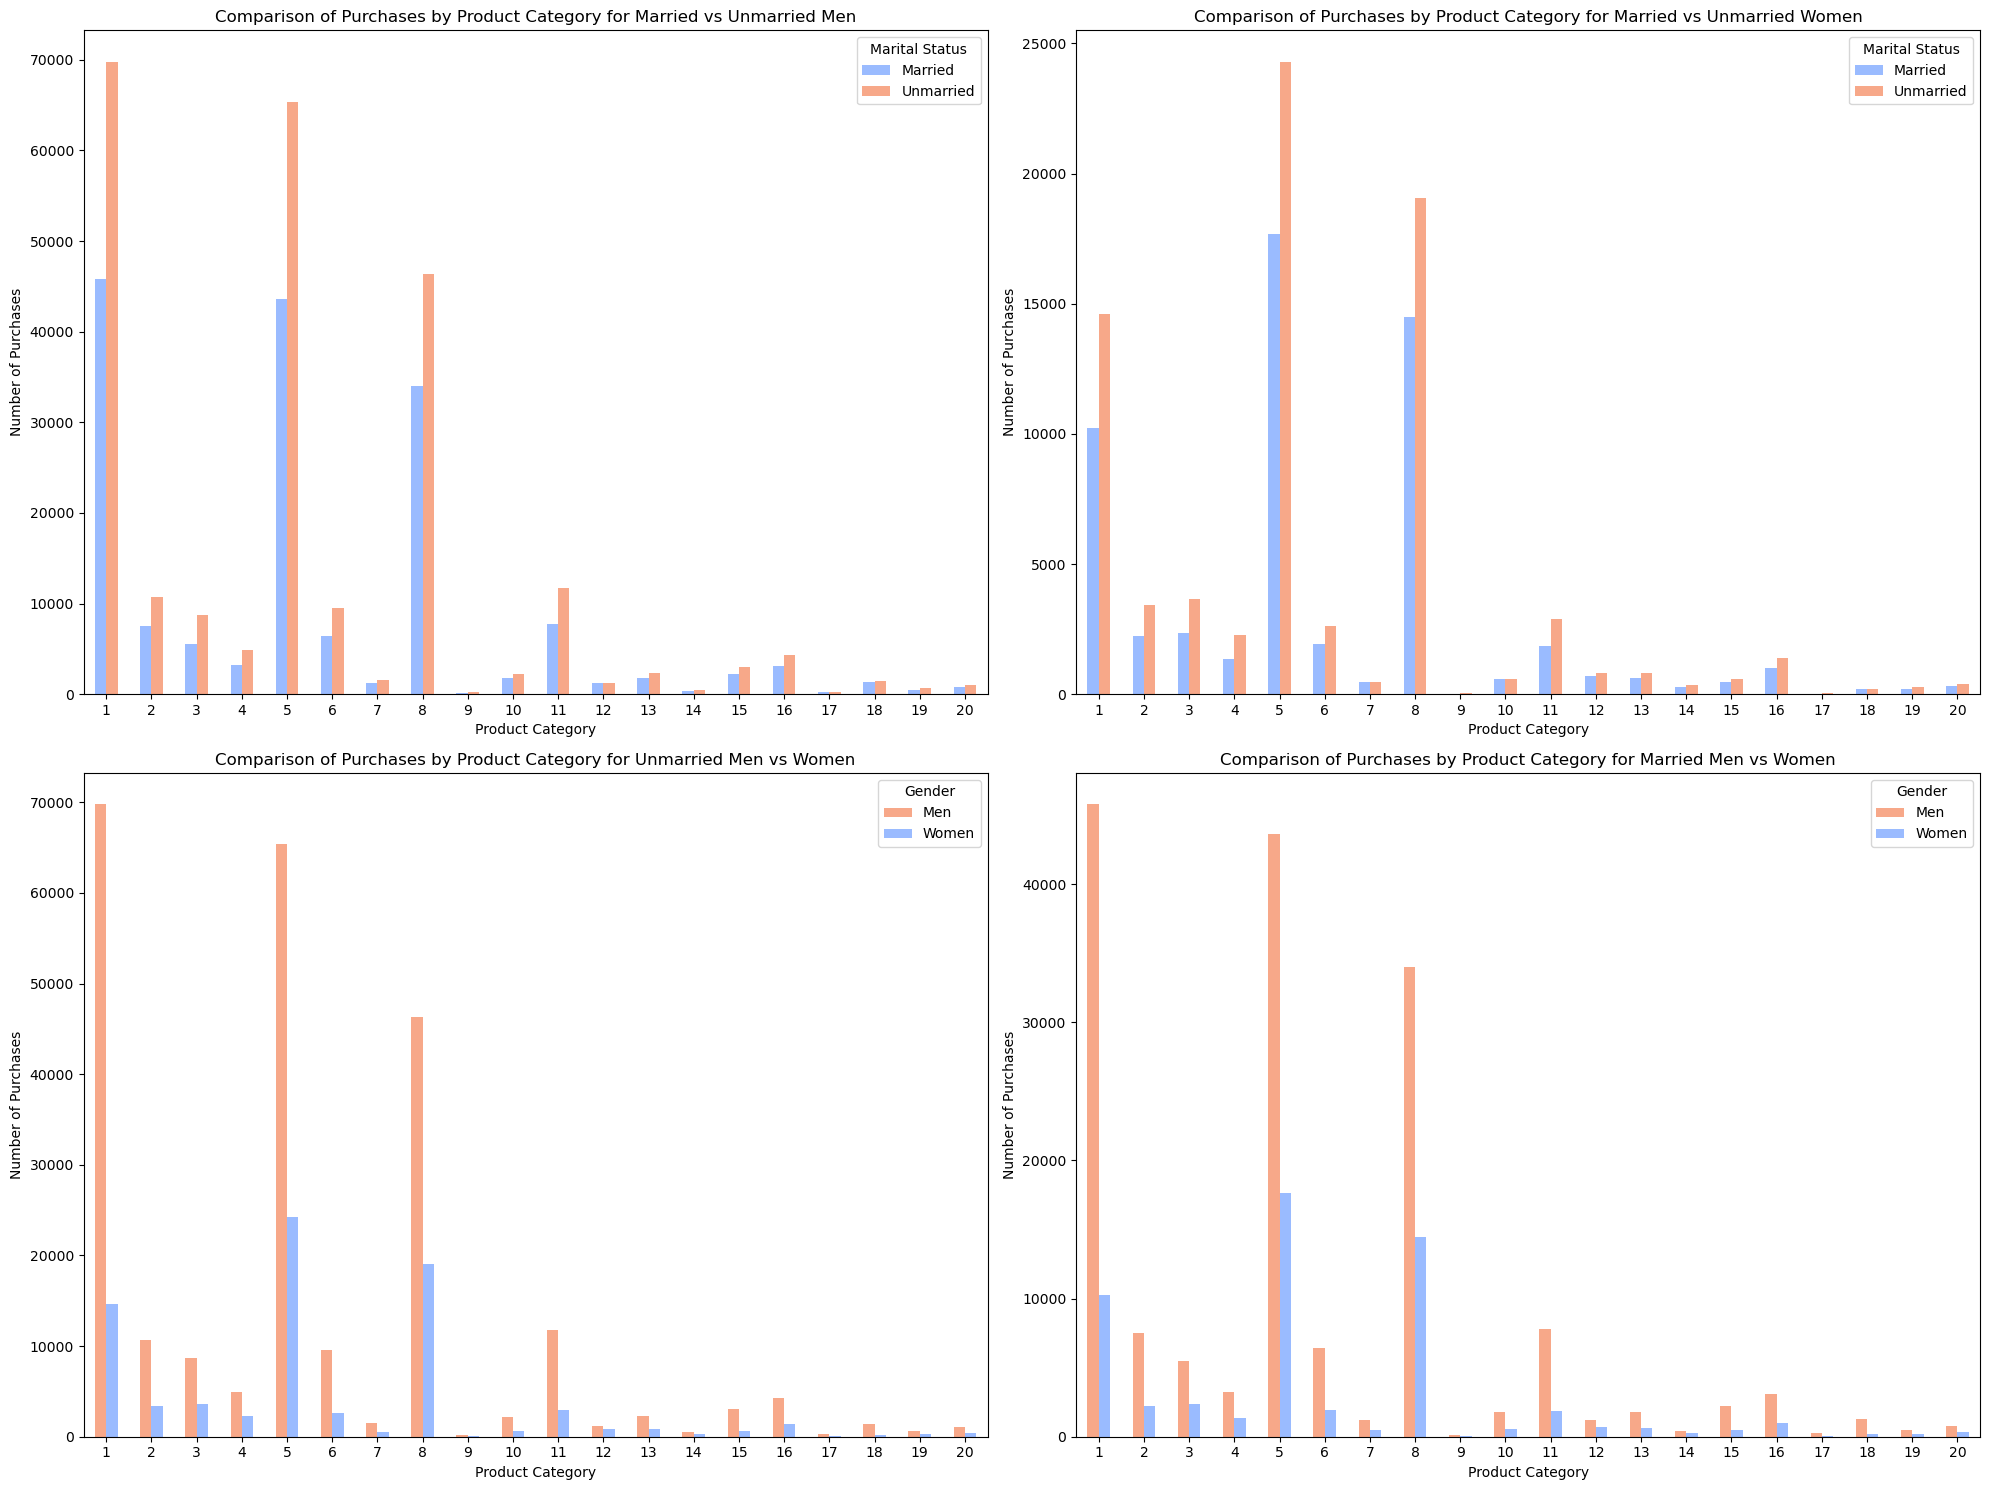

In [399]:
# 2x2 서브플롯 생성
fig, axes = plt.subplots(2, 2, figsize=(20, 15))

# 색상 설정
# base1 : color for Married
# base2 : color for Unmarried

# 서브플롯 1 - 기혼 남성과 미혼 남성의 Product Category별 구매 수 비교
married_men = df[(df['Marital_Status'] == 1) & (df['Gender'] == 'M')]
unmarried_men = df[(df['Marital_Status'] == 0) & (df['Gender'] == 'M')]
married_product_counts = married_men['Product_Category'].value_counts().sort_index()
unmarried_product_counts = unmarried_men['Product_Category'].value_counts().sort_index()

product_counts_df = pd.DataFrame({
    'Married': married_product_counts,
    'Unmarried': unmarried_product_counts
}).fillna(0)

product_counts_df.plot(kind='bar', ax=axes[0, 0], color=[base1, base2])
axes[0, 0].set_title('Comparison of Purchases by Product Category for Married vs Unmarried Men')
axes[0, 0].set_xlabel('Product Category')
axes[0, 0].set_ylabel('Number of Purchases')
axes[0, 0].legend(title='Marital Status')
axes[0, 0].tick_params(axis='x', rotation=0)

# 서브플롯 2 - 기혼 여성과 미혼 여성의 Product Category별 구매 수 비교
married_women = df[(df['Marital_Status'] == 1) & (df['Gender'] == 'F')]
unmarried_women = df[(df['Marital_Status'] == 0) & (df['Gender'] == 'F')]
married_product_counts2 = married_women['Product_Category'].value_counts().sort_index()
unmarried_product_counts2 = unmarried_women['Product_Category'].value_counts().sort_index()

product_counts_df2 = pd.DataFrame({
    'Married': married_product_counts2,
    'Unmarried': unmarried_product_counts2
}).fillna(0)

product_counts_df2.plot(kind='bar', ax=axes[0, 1], color=[base1, base2])
axes[0, 1].set_title('Comparison of Purchases by Product Category for Married vs Unmarried Women')
axes[0, 1].set_xlabel('Product Category')
axes[0, 1].set_ylabel('Number of Purchases')
axes[0, 1].legend(title='Marital Status')
axes[0, 1].tick_params(axis='x', rotation=0)

# 서브플롯 3 - 미혼 남성과 미혼 여성의 Product Category별 구매 수 비교
unmarried_product_counts_men = unmarried_men['Product_Category'].value_counts().sort_index()
unmarried_product_counts_women = unmarried_women['Product_Category'].value_counts().sort_index()

product_counts_df_unmarried = pd.DataFrame({
    'Men': unmarried_product_counts_men,
    'Women': unmarried_product_counts_women
}).fillna(0)

product_counts_df_unmarried.plot(kind='bar', ax=axes[1, 0], color=[base2, base1])
axes[1, 0].set_title('Comparison of Purchases by Product Category for Unmarried Men vs Women')
axes[1, 0].set_xlabel('Product Category')
axes[1, 0].set_ylabel('Number of Purchases')
axes[1, 0].legend(title='Gender')
axes[1, 0].tick_params(axis='x', rotation=0)

# 서브플롯 4 - 기혼 남성과 기혼 여성의 Product Category별 구매 수 비교
married_product_counts_men = married_men['Product_Category'].value_counts().sort_index()
married_product_counts_women = married_women['Product_Category'].value_counts().sort_index()

product_counts_df_married = pd.DataFrame({
    'Men': married_product_counts_men,
    'Women': married_product_counts_women
}).fillna(0)

product_counts_df_married.plot(kind='bar', ax=axes[1, 1], color=[base2, base1])
axes[1, 1].set_title('Comparison of Purchases by Product Category for Married Men vs Women')
axes[1, 1].set_xlabel('Product Category')
axes[1, 1].set_ylabel('Number of Purchases')
axes[1, 1].legend(title='Gender')
axes[1, 1].tick_params(axis='x', rotation=0)

# 전체 레이아웃 조정
plt.tight_layout()
plt.show()

- 나이와 성별에 따른 구매횟수 : 26-35세 남성의 구매횟수가 가장 높다.

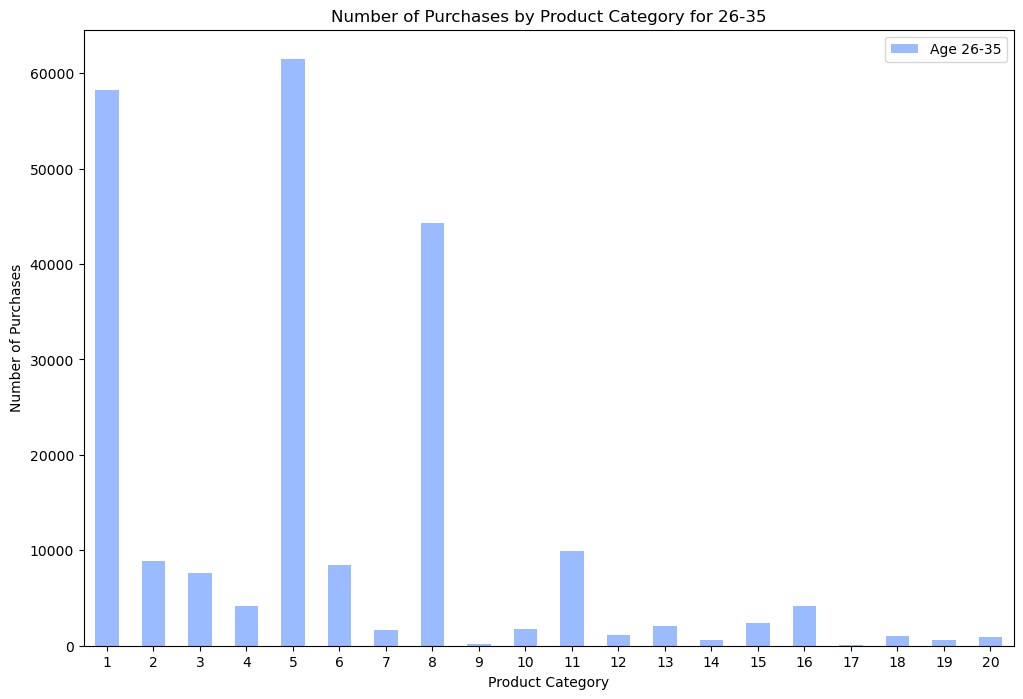

In [512]:
# 데이터 분할
late_twenty = df[(df['Age'] == '26-35') ]

# Product_Category 별 구매 수 계산
product_counts = late_twenty['Product_Category'].value_counts().sort_index()

# 데이터프레임 결합
product_counts = pd.DataFrame({
    'Age 26-35': product_counts}).fillna(0)

# 시각화
product_counts.plot(kind='bar', figsize=(12, 8), color=base1)
plt.title('Number of Purchases by Product Category for 26-35')
plt.xlabel('Product Category')
plt.ylabel('Number of Purchases')
plt.xticks(rotation=0)
plt.show()


## **1. VIP 고객 대상으로 마케팅 전략 도출**

- VIP에 대한 정의가 먼저 필요하다.
- USER ID 별로 Purchase를 카운트 한 후, Purchase에 대한 표준 편차를 계산한다.
- 표준 편차 그래프를 그린 뒤, 특정 임계값 이상을 VIP고객으로 지정한다.

#### 유저 데이터 확인하기

In [451]:
df["User_ID"].describe()

count      550068
unique       5891
top       1001680
freq         1026
Name: User_ID, dtype: int64

## VIP 정의
1. 구매횟수가 가장 높은 상위 10% 고객
2. 조건 1을 만족하면서 최근 구매 시점 및 구매빈도로 볼 수 있는  Stay_In_Current_City_Years == 1인 고객

In [549]:

# 고객별 구매 횟수 계산
purchase_count_customer = df.groupby('User_ID')['Purchase'].count()

# 구매 횟수를 내림차순으로 정렬
purchase_count_customer = purchase_count_customer.sort_values(ascending=False)

# 상위 10% 기준 계산
top_10_percent_threshold = purchase_count_customer.quantile(0.90)

# 구매 횟수가 상위 10%인 고객 필터링
top_10_percent_customers = purchase_count_customer[purchase_count_customer >= top_10_percent_threshold].index

# Stay_In_Current_City_Years가 1인 고객 데이터 필터링
stay_1_df = df[df['Stay_In_Current_City_Years'] == '1']

# 상위 10% 고객 중 Stay_In_Current_City_Years가 1인 고객 추출
vip_customers_df = stay_1_df[stay_1_df['User_ID'].isin(top_10_percent_customers)].drop_duplicates(subset='User_ID')

# VIP 고객들이 가장 많이 살고 있는 City 추출 (중복 제거된 데이터 기반)
vip_city_counts = vip_customers_df['City_Category'].value_counts()
most_common_city = vip_city_counts.idxmax()

# 결과 출력
print("VIP 고객 수:", len(vip_customers_df))
print("VIP 고객이 가장 많은 도시:", most_common_city, '\n')
print(vip_city_counts)

VIP 고객 수: 206
VIP 고객이 가장 많은 도시: B 

City_Category
B    134
A     72
Name: count, dtype: int64


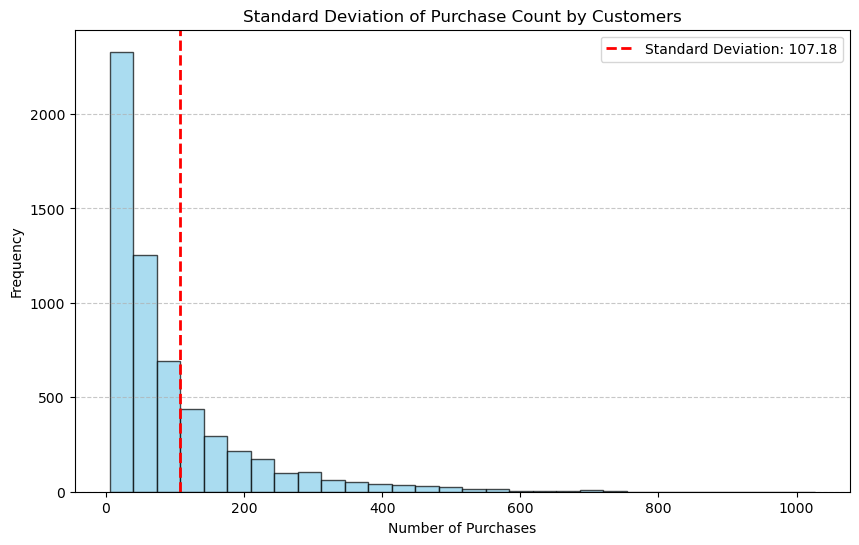

In [465]:
# 고객별 구매 횟수 계산
purchase_count_customer = df.groupby('User_ID')['Purchase'].count()

# 구매 횟수의 표준 편차 계산
std_dev = np.std(purchase_count_customer)

# 표준 편차 그래프 그리기
plt.figure(figsize=(10, 6))
plt.hist(purchase_count_customer, bins=30, alpha=0.7, color='skyblue', edgecolor='black')
plt.axvline(x=std_dev, color='r', linestyle='--', linewidth=2, label=f'Standard Deviation: {std_dev:.2f}')
plt.xlabel('Number of Purchases')
plt.ylabel('Frequency')
plt.title('Standard Deviation of Purchase Count by Customers')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## **2. 지역별 고객들의 구매 특징을 파악하여 마케팅 전략 도출**